# 5. Redes convolucionales - De 101 a PRO

¡Bienvenidos a la quinta sesión! Tras haber visto en la sesión anterior las redes convolucionales y las técnicas más comunes para reducir el overfitting, hoy vamos a ver:

**Redes convolucionales**
* Arquitecturas más comunes
* Extensiones al GD: Momentum, Adagrad, RMSprop, etc...
* Visualización de activaciones y filtros
* Transfer Learning y Fine-Tuning
* Data augmentation

## 5.1 Arquitecturas comunes

Existen grupos de investigación que dedican su vida a desarrollar arquitecturas que funcionen y entrenarlas en datasets enormes, así que parece lógico aprovecharnos de esto en vez de intentar crear cada vez que tengamos un problema una arquitectura propia, verdad?

Esto, no solo nos va a ahorrar tiempo y dolores de cabeza, si no que nos va a aportar precisión y estabilidad!

Las arquitecturas más comunes hoy en día son:

* VGG
* ResNet
* Inception
* Xception

Vamos a verlas brevemente.

### VGG16 y VGG19

Esta arquitectura, que fue una de las primeras en aparecer, fue introducida por Simonyan y Zisserman en 2014 con su paper titulado Very Deep Convolutional Networks for Large Scale Image Recognition, que tenéis disponible aquí: https://arxiv.org/abs/1409.1556.

<img src="https://image.ibb.co/gkEOkJ/imagenet_vgg16.png" alt="imagenet_vgg16" border="0">

Se trata de una arquitectura bastante simple, usando solo bloques compuestos por un número incremental de capas convolucionales con filtros de tamaño 3x3. Además, para reducir el tamaño de los mapas de activación que se van obteniendo, se intercalan bloques maxpooling entre los convolucionales, reduciendo a la mitad el tamaño de estos mapas de activación. Finalmente, se utiliza un bloque de clasificación compuesto por dos capas densas de 4096 neuronas cada una, y una última capa, que es la de salida, de 1000 neuronas.

El 16 y 19 se refiere al número de capas con pesos que tiene cada red (las convolucionales y las densas, las de pooling no se cuentan). Se corresponden con las columnas D y E de la tabla a continuación.

<img src="https://image.ibb.co/cAyikJ/imagenet_vggnet_table1.png" alt="imagenet_vggnet_table1" border="0">

El motivo por el que veis el resto de arquitecturas en la tabla es porque, por aquel entonces, a Simonyan y Zisserman les costó bastante entrenar su arquitectura de forma que convergiera. Como no lo conseguían, lo que se les ocurrió fue entrenar primero redes con arquitecturas más sencillas, y una vez estas convergían y estaban entrenadas, aprovechavan sus pesos para inicializar la siguiente red, que era un poco más compleja, y así hasta llegar a la VGG19. Fijáos la importancia que tiene la inicialización de los pesos, como ya hemos visto. A este proceso se le conoce como "pre-training".

Sin emargo, esto fue en aquellos tiempos, ahora ya no se hace esto, ya que requiere de demasiado tiempo. Ahora podemos conseguir lo mismo utilizando la inicialización de Xavier/Glorot o de He et al., que ya vimos en la sesión 3.

Esta red, sin embargo, tiene un par de desventajas:

* Tarda muchísimo en entrenar
* Tiene un número muy elevado de parámetros

### ResNet

La arquitectura de ResNet, desarrollada por He et al. en 2015 (podéis ver su paper llamado "Deep Residual Learning for Image Recognition" aquí: https://arxiv.org/abs/1512.03385), supuso un hito al introducir un tipo de arquitectura exótica basada en "módulos", o como se conoce ahora, "redes dentro de redes".

Estas redes introdujeron el concepto de "conexiones residuales", que podéis ver en la siguiente imagen:

<center><img src="https://image.ibb.co/dXfUQJ/imagenet_resnet_residual.png" alt="imagenet_resnet_residual" border="0"></center>

Estos bloques lo que permiten es que llegue a la capa $l+1$ parte del mapa de activaciones previo sin modificar, y parte modificado por el bloque perteneciente a la capa $l$, como podéis ver en la imágen superior.

En 2016 mejoraron esta arquitectura incluyendo más capas en estos bloques residuales, como podéis observar en la siguiente imagen:

<center><img src="https://image.ibb.co/fmWEsy/imagenet_resnet_identity.png" alt="imagenet_resnet_identity" border="0"></center>

Existen variaciones de ResNet con distinto número de capas, pero la más usada es la ResNet50, que consta de 50 capas con pesos.

Es llamativo que aunque tiene muchas más capas que la VGG, necesita mucha menos memoria, casi 5 veces menos. Eso se debe a que esta red, en vez de capas densas en la etapa de clasificación, utiliza un tipo de capa que se llama **GlobalAveragePooling**, que lo que hace es convertir los mapas de activacones 2D de la última capa de la etapa de extracción de características a un vector de $n_{classes}$ que se utiliza para calcular la probabilidad de pertenecer a cada clase.

### Inception V3

Este tipo de arquitectura, que se introdujo en 2014 por Szegedy et al. en su paper llamado "Going Deeper with Convolutions" (https://arxiv.org/abs/1409.4842), utiliza bloques con filtros de diferentes tamaños que luego concatena para poder extraer características a diferentes escalas. Fijaos en la imagen:

<img src="https://image.ibb.co/mUJusy/imagenet_inception_module.png" alt="imagenet_inception_module" border="0">

Para que lo entendáis, la meta del bloque "inception" es calcular mapas de activaciones con convoluciones de 1x1, 3x3 y 5x5 para conseguir extraer características a diferentes escalas. Luego simplemente se concatenan todos estos mapas de activaciones en uno solo.

Esta arquitectura necesita incluso menos memoria que la VGG y la ResNet.

### Xception

Esta arquitectura la propuso François Chollet (el creador de Keras) y lo unico que aporta respecto a Inception es que realiza las convoluciones de una forma óptima para que tarden menos tiempo. Esto lo consigue separando las convoluciones 2D en 2 convoluciones 1D. Si tenéis interés en saber más, aquí tenéis el paper: "Xception: Deep Learning with Depthwise Separable Convolutions", https://arxiv.org/abs/1610.02357.

En términos de memoria es muy similar a la Xception, y este es el esquema de su arquitectura:

<img src="https://image.ibb.co/dpKpQJ/imagenet_xception_flow.png" alt="imagenet_xception_flow" border="0">

Por último, merece la pena hablar también de la SqueezeNet.

### SqueezeNet

Esta red es extremadamente ligera (sus pesos ocupan 5MB, en comparación de los 500MB de la VGG, o los 100 de la Inception, por ejemplo) y consigue un accuracy de ~57% rank-1 o ~80% rank-5 con el ImageNet.

¿Qué significa rank-1 y rank-5, o top-1 y top-5? 

* rank-1 accuracy: comparamos si la clase con la mayor probabilidad según nuestra red acierta a la etiqueta real
* rank-5 accuracy: comparamos si una de las 5 clases con mayor probailidad según nuestra red acierta a la etiqueta real

¿Cómo consigue esta red ocupar tan poco y a la vez ser precisa? Pues lo consigue utilizando una arquitectura que "comprime" los datos y después los expande, tal y como podéis ver en la siguiente imagen:

<img src="https://image.ibb.co/dQjpQJ/imagenet_squeezenet_fire.png" alt="imagenet_squeezenet_fire" border="0">


### Comparación de tamaños

<img src="https://image.ibb.co/kUF5jd/net_param_size.png" alt="net_param_size" border="0">

### Comparación del accuracy que consiguen vs. número de parámetros

<img src="https://image.ibb.co/fAqo4d/net_comp_acc_vs_params.png" alt="net_comp_acc_vs_params" border="0">

### Fuentes:

* https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/
* https://towardsdatascience.com/neural-network-architectures-156e5bad51ba
* https://medium.com/@siddharthdas_32104/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

Tenéis que saber que hay infinitas arquitecturas, pero estas son con diferencia las más usadas. Normalmente, ante un problema, no vamos a ponernos a definir nuestra arquitectura, sino que usaremos una de estas arquitecturas.

Vale, pues ahora que ya las habéis visto, vamos a ver cómo podemos implementarlas en Keras

### Ejemplo de clasificación de imágenes con VGG, ResNet, Inception y Xception con Keras

In [1]:
!pip install imageio

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from keras.applications import ResNet50, InceptionV3, Xception, VGG16, VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import urllib
import cv2
import matplotlib.pyplot as plt
import imageio as io

In [3]:
# importamos los paquetes necesarios
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # solo con el backend de TensorFlow
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import urllib
import cv2
import matplotlib.pyplot as plt
import imageio as io

def predict_image(model_name, image_source):
  
  # definimos un diccionario que mapea el nombre de la red con el modelo importado
  # de Keras
  MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow solo!
    "resnet": ResNet50
  }

  # establecemos el tamaño de entrada y la función de preprocesamiento de imagen
  # recordad que nosotros por ejemplo haciamos una normalización, pues en Keras
  # están definidas las funciones de pre-procesamiento de cada red, por lo que no
  # tenemos que preocuparnos de nada :)
  input_shape = (224, 224)
  preprocess = imagenet_utils.preprocess_input

  # si usamos InceptionV3 o Xception, necesitamos establecer un tamaño diferente
  # de imagen de entrada (299x299) y usar una función de preprocesamiento diferente
  if model_name in ("inception", "xception"):
    input_shape = (299, 299)
    preprocess = preprocess_input

  print("[INFO] loading {}...".format(model_name))
  Network = MODELS[model_name]
  model = Network(weights="imagenet") # cargamos la red con los pesos ya entrenados con el ImageNet
  # la primera vez que lo ejecutemos Keras se descargará los pesos, que son 500MB 
  # si usamos la VGG o unos 100 en los otros casos, así que es posible que tarde

  # cargamos la imagen y nos aseguramos de que el tamaño es el adecuado
  print("[INFO] loading and pre-processing image...")
  if type(image_source) == str:
    image = load_img(image_source, target_size=input_shape)
    image = np.resize(image, (input_shape[0], input_shape[1], 3))
    image = img_to_array(image)
  else:
    image = np.resize(image_source, (input_shape[0], input_shape[1], 3))
    image = img_to_array(image)

  # nuestra imagen es representada como un array de tamaño:
  # (inputShape[0], inputShape[1], 3) 
  # y necesitamos: (1, inputShape[0], inputShape[1], 3)
  # así que expandimos las dimensiones
  image = np.expand_dims(image, axis=0)

  # pre-procesamos la imagen
  image = preprocess(image)

  # predecimos la clase de nuestra imagen
  print("[INFO] classifying image with '{}'...".format(model_name))
  preds = model.predict(image)
  P = imagenet_utils.decode_predictions(preds)

  # mostramos las predicciones rank-5 y su probabilidad
  for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

  img = io.imread(image_source)
  (imagenetID, label, prob) = P[0][0]
  cv2.putText(img, "Label: {}, {:.2f}%".format(label, prob * 100), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
  plt.imshow(img)
  plt.axis('off')
  
  return model

Using TensorFlow backend.


In [4]:
# download images
!wget https://image.ibb.co/cuw6pd/soccer_ball.jpg
!wget https://image.ibb.co/hdoVFJ/bmw.png
!wget https://image.ibb.co/h0B6pd/boat.png
!wget https://image.ibb.co/eCyVFJ/clint_eastwood.jpg

--2020-06-15 18:48:41--  https://image.ibb.co/cuw6pd/soccer_ball.jpg
Resolving image.ibb.co (image.ibb.co)... 51.178.88.195
Connecting to image.ibb.co (image.ibb.co)|51.178.88.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37935 (37K) [image/jpeg]
Saving to: ‘soccer_ball.jpg’

soccer_ball.jpg     100%[===================>]  37.05K  --.-KB/s    in 0.01s   

2020-06-15 18:48:41 (2.77 MB/s) - ‘soccer_ball.jpg’ saved [37935/37935]

--2020-06-15 18:48:42--  https://image.ibb.co/hdoVFJ/bmw.png
Resolving image.ibb.co (image.ibb.co)... 51.178.88.195
Connecting to image.ibb.co (image.ibb.co)|51.178.88.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347784 (340K) [image/png]
Saving to: ‘bmw.png’

bmw.png             100%[===================>] 339.63K  --.-KB/s    in 0.05s   

2020-06-15 18:48:43 (6.22 MB/s) - ‘bmw.png’ saved [347784/347784]

--2020-06-15 18:48:44--  https://image.ibb.co/h0B6pd/boat.png
Resolving image.ibb.co (image.ibb

In [5]:
!ls

bmw.png  boat.png  clint_eastwood.jpg  sample_data  soccer_ball.jpg


[INFO] loading xception...
91889664/91884032 [==============================] - 4s 0us/step
[INFO] loading and pre-processing image...
[INFO] classifying image with 'xception'...
1. soccer_ball: 92.84%
2. volleyball: 2.36%
3. rugby_ball: 0.74%
4. croquet_ball: 0.07%
5. balloon: 0.07%


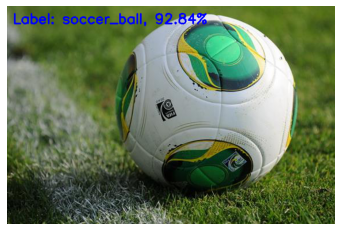

In [9]:
model = predict_image('xception', 'soccer_ball.jpg')

In [10]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

[INFO] loading vgg16...
[INFO] loading and pre-processing image...
[INFO] classifying image with 'vgg16'...
1. fur_coat: 55.19%
2. stole: 5.19%
3. cardigan: 3.31%
4. bow_tie: 1.91%
5. rifle: 1.77%


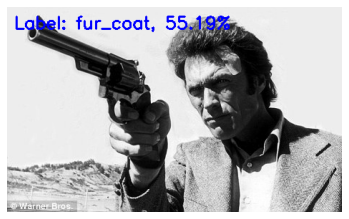

In [17]:
model = predict_image('vgg16', 'clint_eastwood.jpg')

In [18]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 5.2 Extensiones al GD

Hasta ahora hemos visto 3 métodos para implementar el backpropagation:

* Gradient Descent
* Stochastic Gradient Descent
* Mini-Batch Stochastic Gradient Descent

De los cuales, nos quedamos con el mini-batch porque permite una mayor rapidez, al no tener que calcular los gradientes y errores para todo el dataset, y elimina la alta variabilidad existente en el SGD.

Bueno, pues existen mejoras sobre estos métodos, como el **momentum**. Además, hay otros algoritmos más complejos como el Adam, RMSProp o el Adagrad.

Vamos a verlos!

<!-- TODO: http://cs231n.github.io/neural-networks-3/#update-->

### 5.2.1 Momentum

Imáginad que volvéis a ser un crio y que se os ha ocurrido la genial idea de poneros vuestros patines, subiros a lo alto de la calle más empinada y empezar a bajarla. Ni que decir tiene que sois totalmente principiantes y esta es la segunda vez que os calzáis unos patines.

No sé si alguno de vosotros habrá hecho esto realmente alguna vez, pero bueno, yo sí, así que os voy a explicar lo que pasa:

* nada más empezar, la velocidad es pequeña, incluso parece que controlas y que podrías parar en cualquier momento
* pero conforme más bajas, más velocidad coges: **a esto se le llama momento (momentum)**
* con lo cual, conforme más carretera bajas, más *inercia* llevas y más rápido recorres los metros

Bueno, para aquellos que seáis curiosos, el final de la historia es que al final de la calle empinada hay una valla. El resto os lo podéis imaginar...

Pues bien, el momento es precisamente esto. Conforme vamos bajando en nuestra curva de pérdidas al calcular los gradientes y hacer las actualizaciones, más importancia le damos a las actualizaciones que van en la dirección que minimizan el gradiente, y menos importancia a las que van en otras direcciones. 

<img src="https://image.ibb.co/e5DyHd/opt_momentum.png" alt="opt_momentum" border="0">

Así, lo que conseguimos es acelerar el entrenamiento de la red. 

Además, gracias al momento, podría haber sido capaz de evitar pequeños baches o agujeros en la carretera (volar sobre ellos gracias a mi velocidad). 

TEORÍA: http://cs231n.github.io/neural-networks-3/#sgd

### 5.2.2 Nesterov momentum

Volviendo al ejemplo de antes: estamos bajando la carretera a toda velocidad (porque hemos construído mucho momento) y de repente vemos al final la vaya. Nos gustaría ser capaces de frenar, de reducir la velocidad para no estamparnos. Pues esto es precisamente lo que hace Nesterov.

Lo que hace Nesterov es calcular el gradiente, en vez de en el punto actual, en el punto en el que sabemos que nuestro momento va a llevarnos, para luego aplicar una corrección.

<!-- <img src="https://image.ibb.co/fWsscd/opt_momentum_nesterov.png" alt="opt_momentum_nesterov" border="0">-->

<img src="https://image.ibb.co/eAPBnd/opt_momentum_nesterov_2.png" alt="opt_momentum_nesterov_2" border="0">

Fijaos: usando el momento estándar, calculamos el gradiente (vector azul pequeño) y luego damos un gran paso en la dirección del gradiente (vector azul grande).

Usando Nesterov, primero daríamos un gran salto en la dirección de nuestro gradiente previo (vector marron), mediriamos el gradiente y haríamos la corrección oportuna (vector rojo).

En la práctica, funciona un poco mejor que el momento a solas. Es como calcular el gradiente de los pesos en el futuro (porque les hemos sumado el momento que habíamos calculado).

TEORÍA: http://cs231n.github.io/neural-networks-3/#sgd




Tanto el momento como el momento de Nesterov son extensiones del SGD.

Lo que vamos a ver ahora están basadas en learning rates adaptativos, lo que nos permite acelerar o frenar la *velocidad* con la que actualizamos los pesos. Por ejemplo, podríamos usar una velocidad alta al principio, e ir bajándola conforme nos aproximásemos al mínimo.

### 5.2.3 Adaptive gradient (AdaGrad)

Lleva un historial de los gradientes calculados (en concreto, de la suma de los gradientes al cuadrado) y normaliza el "paso" de la actualización.

La idea es que los parámetros que tengan un gradiente muy alto, y por tanto, la actualización de sus pesos fuese a ser brusca, se les asignará un learning rate bajo.

A la misma vez, los parámetros que tengan un gradiente muy bajo, se les asignará un learning rate alto.

Así conseguimos acelerar la convergencia.

PAPER: http://jmlr.org/papers/v12/duchi11a.html

### 5.2.4 RMSprop

El problema de AdaGrad es que al calcular la suma de los gradientes al cuadrado, estamos usando una funcion monotónica creciente, lo que puede ocasionar que el learning rate trate de compensar valores que no dejan de crecer hasta que se hace cero, con lo que deja de aprender.

Lo que propone RMSprop, que no está publicado, pero podéis leer más sobre él aquí: http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf, es decrementar esa suma de los gradientes al cuadrado usando un `decay_rate`.


### 5.2.5 Adam

Por último, Adam es uno de los algoritmos más modernos, que mejora el RMSprop añadiendo momento a la regla de actualización. Introduce 2 nuevos parámetros, `beta1` y `beta2`, con valores recomendados de 0.9 y 0.999.

PAPER: https://arxiv.org/abs/1412.6980

### Pero mejor vamos a lo que nos interesa, cuál tengo que utilizar?

<img src="https://image.ibb.co/mjHstJ/opts_comp.png" alt="opts_comp" border="0">

**Como regla general, empezad con Adam.** Si no funciona bien, ya os calentaréis la cabeza.

+INFO: 
* https://deepnotes.io/sgd-momentum-adaptive
* http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms

## 5.3 Visualización de activaciones y filtros

La mayoría de la gente considera que las redes neuronales son una caja negra, pero eso es por dos cosas:

* no entienden el back-propagation
* nunca han visualizado *el estado* de sus redes neuronales

Nosotros ya sabemos como funciona el backprop, pero todavía no hemos visualizado nada. Así que vamos a por ello!

Primero, qué es lo que podemos visualizar?

* los mapas de las activaciones de las capas
* los filtros de nuestras capas convolucionales
* qué imágenes dan la máxima activación para cada clase de nuestro dataset

### 5.3.1 Visualización de las activaciones de las capas

Esto es de lo mejorcito que podemos hacer para entender cómo funciona nuestra red.

Las activaciones de las capas son simplemente los resultados que obtenemos a la salida de cada capa durante la forward pass. Normalmente, cuando visualizamos las activaciones de una red con activaciones de tipo ReLU, necesitamos unas cuantas épocas antes de empezar a ver algo útil.

Una cosa para la que son muy útiles es para ver si algún filtro está completamente negro para diferentes entradas, es decir, todos sus elementos son siempre 0. Esto significa que el filtro está *muerto*, y normalmente pasa cuando entrenamos con learning rates altos.

Aquí podéis ver unos ejemplos, aunque luego lo vamos a hacer nosotros:

<img src="https://image.ibb.co/j1Jkfy/vis_act1.jpg" alt="vis_act1" border="0" height="400">
<img src="https://image.ibb.co/eauQfy/vis_act2.jpg" alt="vis_act2" border="0" height="400">

Estos ejemplos se corresponden con las activaciones típicas de la primera capa convolucional (izqda) y de la quinta (dcha) de la red AlexNet entrenada cuando ve una imagen de un gato.


### 5.3.2 Visualización de los filtros de las capas convolucionales

Otra cosa que podemos visualizar para ver cómo funciona nuestra red neuronal convolucional, son los filtros que ha aprendido. Normalmente, estos filtros son más interpetables en las primeras capas de la red que en las últimas. Sobretodo, es útil visualizar los filtros de la primera, que está mirando directamente a las imágenes de entrada.

Fijaos, a continuación podéis ver los filtros de la primera y la segunda capa convolucional de la AlexNet.

<img src="https://image.ibb.co/g2H0DJ/vis_filt1.jpg" alt="vis_filt1" border="0" height="400">
<img src="https://image.ibb.co/h9L97d/vis_filt2.jpg" alt="vis_filt2" border="0" height="400">

Y quizás os estéis preguntando que de qué os sirve visualizar estos filtros, verdad?

Pues porque normalmente, una red bien entrenada tendrá filtros perfectamente definidos, al menos en las primeras capas, y sin practicamente ruido. Si os fijáis, es el caso de la imagen de ejemplo.

Si por el contrario tuviésemos filtros con mucho ruido podría deberse a que hace flata entrenar más la red, o a que tenemos overfitting y necesitamos algún método de regularización.

Los filtros de la segunda capa son menos indicativos, pero aún así, se puede intuir que no tienen ruido. Esto lo veremos mejor con el ejemplo que haremos luego.

### 5.3.3 Visualización de las imágenes que más activan una determinada neurona (=clase de nuestro dataset)

Por último, otra cosa que puede ayudaros a decidir si vuestra red está funcionando bien o no es visualizar las imágenes que más activan cada neurona de salida, lo que equivale a visualizar las imágenes que más se acercan a cada clase de vuestro dataset.

Para ello, se suele coger un buen dataset de imágenes y pasárlas a la red mientras se lleva un histórico de qué imágenes activan más una determinada neurona. Así, luego podemos visualizar las imágenes que más han activado esa neurona, además de su *receptive field*.

A continuación podéis ver las imágenes que más activan algunas de las neuronas de la capa POOL5 de AlexNet. El recuadro blanco muestra el receptive field.

<img src="https://image.ibb.co/cdPfDJ/vis_pool5max.jpg" alt="vis_pool5max" border="0" height="400">

Podéis apreciar como el campo receptivo es bastante grande, y que algunas neuronas reaccionan más a partes de cuerpo, textos, etc.


## Veamos todo esto con un ejemplo!

## Ejemplo: visualizando activaciones de capas y filtros

Cómo funciona: https://raghakot.github.io/keras-vis/visualizations/activation_maximization/

### Vamos primero a visualizar las activaciones de la última capa (activation y saliency)

Para ello, necesitamos cambiar la activación de la última capa, de softmax a lineal, para una correcta visualización.

In [19]:
# instalamos las versiones adecuadas, si no, no funcionará
!pip uninstall vis -y
!pip uninstall keras-vis -y
!pip uninstall keras-vis-temp -y
!pip install git+https://github.com/raghakot/keras-vis.git -U
!pip install scipy==1.1.0

Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-5_oireq8
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-5_oireq8
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38884 sha256=b86d14809d49980032427e376b457abc3b58cea5ee56c0640cbb080f04220cbb
  Stored in directory: /tmp/pip-ephem-wheel-cache-s1025smd/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis
     |████████████████████████████████| 31.2MB 102kB/s 
ERROR: umap-learn 0.4.4 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
  

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

Using TensorFlow backend.


In [3]:
# construímos la VGG16 con sus pesos
model = VGG16(weights='imagenet', include_top=True)

# buscamos el índice de la capa por nombre
layer_idx = utils.find_layer_idx(model, 'predictions')

# cambiamos la activación softmax por lineal
model.layers[layer_idx].activation = activations.linear

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

Vamos a ver ahora un ejemplo con dos imágenes reales para ver dónde se está fijando la red:

(-0.5, 223.5, 223.5, -0.5)

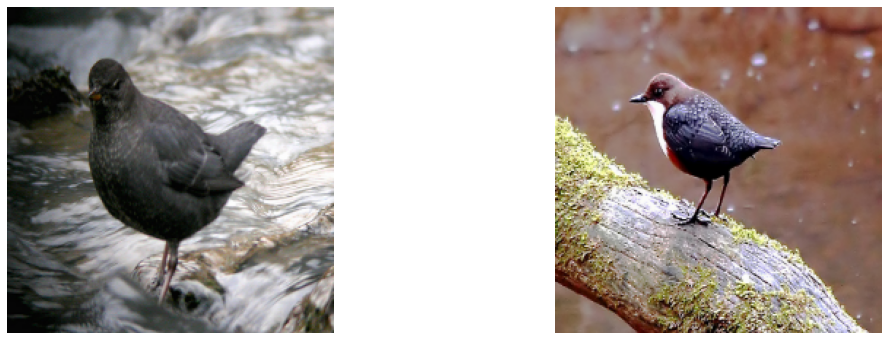

In [5]:
img1 = utils.load_img('https://image.ibb.co/ma90yJ/ouzel2.jpg', target_size=(224, 224))
img2 = utils.load_img('https://image.ibb.co/djhyky/ouzel1.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[0].grid(False)
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].grid(False)
ax[1].axis('off')

A la función `visualize_saliency` tenemos que pasarle el modelo, el id de la capa, el id de la clase para la que queremos ver las activaciones, y la imagen para la que queremos ver las activaciones.
    
Y qué es eso del id de la clase para la que queremos ver las activaciones? pues que en el caso de la VGG16 coon los pesos de la ImageNet, la clase pájaro es la 20, por lo cual, si le metemos una imagen de un pájaro, debería activarse bastante, e indicarnos en qué se fija para decidir que efectivamente es un pájaro. Si le metiésemos un 64, buscaría una green mamba, que es una serpiente por lo que las activaciones deberían ser mucho menores.

<img src="https://www.rspb.org.uk/globalassets/images/wildlife/birds/dipper/1040843-dipper.jpg" border="0" height="180">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Eastern_Green_Mamba_02.jpg/220px-Eastern_Green_Mamba_02.jpg" border="0" height="180">

Tenéis el listado completo de las 1000 clases aquí: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

Vamos entonces a ver las activaciones para nuestras dos imágenes de prueba!

Número de capa:  22



/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


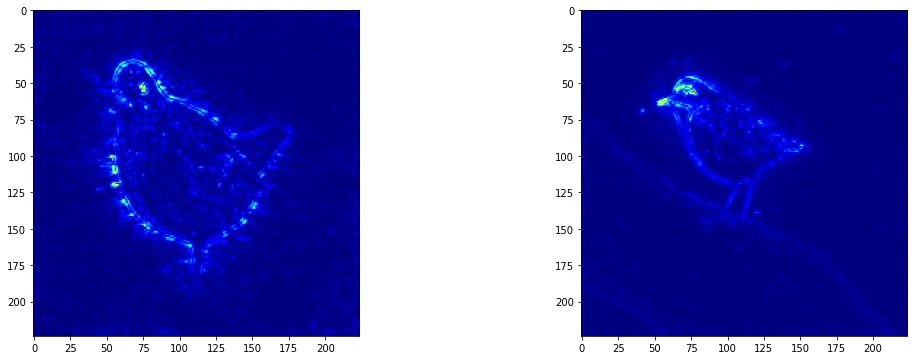

In [7]:
# ver activaciones con saliency

# imports necesarios
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations


# con esta línea encontramos el índice de la capa predicciones, que es la que
# queremos ver sus activaciones
layer_idx = utils.find_layer_idx(model, 'predictions')
print('Número de capa: ', layer_idx)

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    
    # 20: 'water ouzel, dipper'
    grads = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=img, backprop_modifier='guided')
    
    # vamos a ver las activaciones con el colormap=jet, que es adecuado para ver
    # mapas de probabilidades
    ax[i].imshow(grads, cmap='jet')
    ax[i].grid(False)

(-0.5, 223.5, 223.5, -0.5)

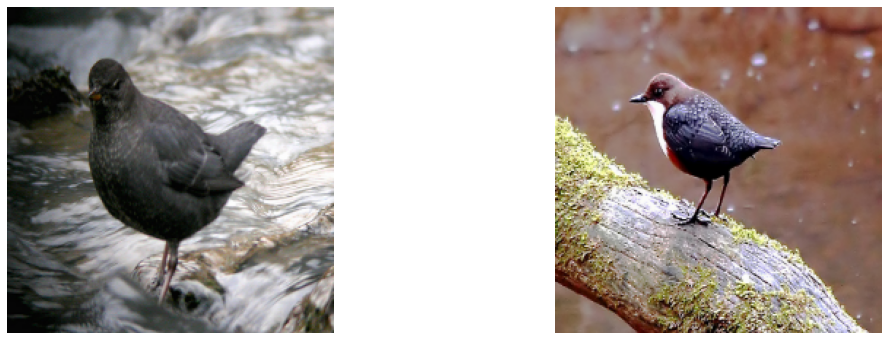

Fijáos como aparecen las zonas en las que se fija nuestra red para hacer la predicción.

Vamos a probar otro método de visualización: el cam-saliency.

En este caso, la visualización contiene más detalles, ya que hace uso de la información no solo de la capa indicada, si no de la anterior capa Conv o Pool que encuentre.

PAPER: https://arxiv.org/pdf/1610.02391v1.pdf

Fijáos qué preciosidad:

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


<Figure size 1296x432 with 0 Axes>

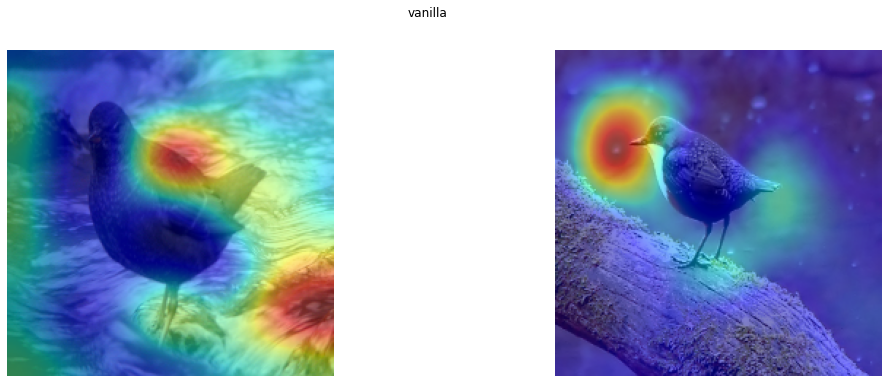

<Figure size 1296x432 with 0 Axes>

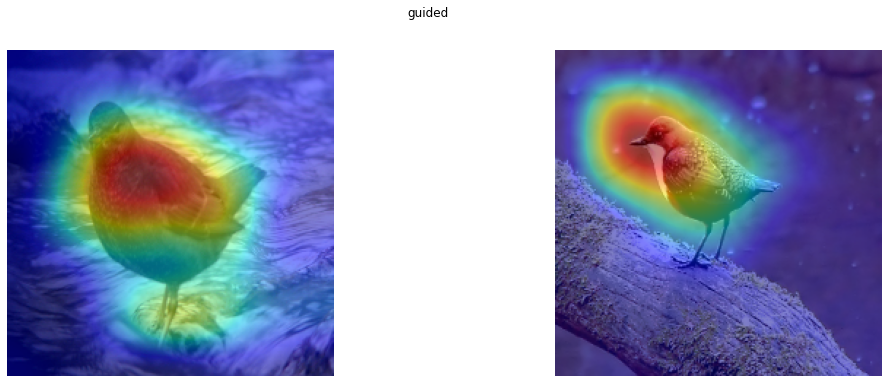

<Figure size 1296x432 with 0 Axes>

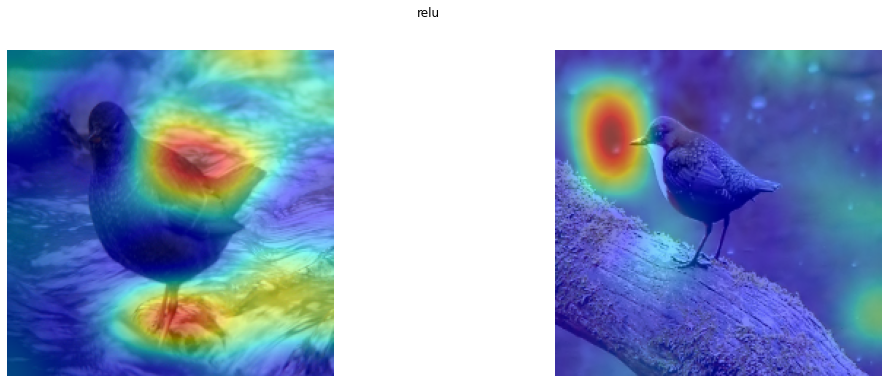

In [12]:
# ver activaciones con cam-saliency

# imports necesarios
from vis.visualization import visualize_cam, overlay
from vis.utils import utils
import matplotlib.cm as cm
from keras import activations
import numpy as np

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    
    for i, img in enumerate([img1, img2]):    
        
        # 20 es el indice correspondiente a la clase 'ouzel'
        grads = visualize_cam(model, layer_idx, filter_indices=20, seed_input=img, backprop_modifier=modifier)
        
        # como la salida es una imagen 2D, tenemos que convertirla a 3D para
        # poder mostrarla 
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)

        ax[i].imshow(overlay(jet_heatmap, img))
        ax[i].axis('off')

### Veamos los filtros!

Genial!! Pues vamos a ver ahora los filtros, no?!

Vamos a ver primero qué filtros se utilizan para detectar a los pájaros anteriores:

In [21]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.2


Iteration: 1, named_losses: [('ActivationMax Loss', -0.0005624832),
 ('L-6.0 Norm Loss', 0.06325796),
 ('TV(2.0) Loss', 6445.7207)], overall loss: 6445.783203125
Iteration: 2, named_losses: [('ActivationMax Loss', -0.00064378063),
 ('L-6.0 Norm Loss', 0.06268683),
 ('TV(2.0) Loss', 3413.712)], overall loss: 3413.77392578125
Iteration: 3, named_losses: [('ActivationMax Loss', -0.0007139901),
 ('L-6.0 Norm Loss', 0.06235042),
 ('TV(2.0) Loss', 1871.8416)], overall loss: 1871.9031982421875
Iteration: 4, named_losses: [('ActivationMax Loss', -0.0007407894),
 ('L-6.0 Norm Loss', 0.062132727),
 ('TV(2.0) Loss', 994.33344)], overall loss: 994.3948364257812
Iteration: 5, named_losses: [('ActivationMax Loss', -0.00071022374),
 ('L-6.0 Norm Loss', 0.06198943),
 ('TV(2.0) Loss', 486.37656)], overall loss: 486.4378356933594
Iteration: 6, named_losses: [('ActivationMax Loss', -0.0006887923),
 ('L-6.0 Norm Loss', 0.061895996),
 ('TV(2.0) Loss', 203.8939)], overall loss: 203.95510864257812
Iteration:

(-0.5, 223.5, 223.5, -0.5)

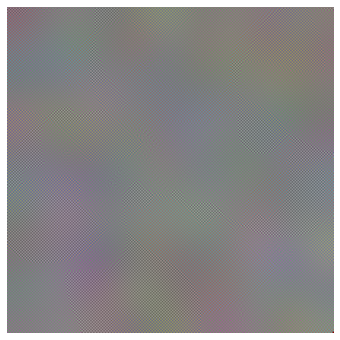

In [22]:
# visualizamos los patrones para 'ouzel' (categoría 20 de ImageNet)
from vis.visualization import visualize_activation

# construímos la VGG16 con sus pesos
model = VGG16(weights='imagenet', include_top=True)

# buscamos el índice de la capa por nombre
layer_idx = utils.find_layer_idx(model, 'predictions')

# cambiamos la activación softmax por lineal
model.layers[layer_idx].activation = activations.linear

img = visualize_activation(model, layer_idx, filter_indices=20, max_iter=500, verbose=True)
fig, ax = plt.subplots(1)
ax.imshow(img)
ax.axis('off')

In [0]:
# visualizar de forma más precisa aumentando las iteraciones del optimizador

In [0]:
# veamos ahora los patrones que permiten detectar la serpiente (green mamba, índice 64 de ImageNet)

Ahora, vamos a ver las visualizaciones de algunos de los filtros de la primera capa convolucional:


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


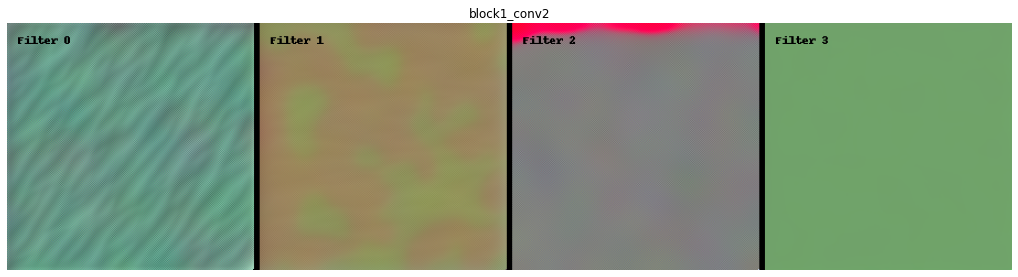

In [23]:
from vis.visualization import visualize_activation, get_num_filters

# buscamos el índice de la capa cuyos filtros queremos visualizar
layer_name = 'block1_conv2'
layer_idx = utils.find_layer_idx(model, layer_name)

# creamos un array con valores de 0 al núm de filtros a visualizar
# en nuestro caso, 4 por temas de tiempo, pero con la siguiente línea
# podríamos visualizarlos todos:
# filters = np.arange(get_num_filters(model.layers[layer_idx]))
filters = np.arange(4)

# guardamos cada filtro en vis_images
plt.rcParams['figure.figsize'] = (18, 6) # tamaño de las imágenes
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # escribimos el índice del filtro
    img = utils.draw_text(img, 'Filter {}'.format(idx))    
    vis_images.append(img)

# generamos una imagen donde se visualizen todos
stitched = utils.stitch_images(vis_images, cols=8)    
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

Vamos a ver ahora filtros de diferentes capas:

In [24]:
selected_indices = []
layers_to_visualize = ['block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']
for layer_name in layers_to_visualize:
    layer_idx = utils.find_layer_idx(model, layer_name)

    # seleccionamos aleatoriamente 4 filtros de cada capa
    filters = np.random.permutation(get_num_filters(model.layers[layer_idx]))[:4]
    selected_indices.append(filters)

    # generamos el mapa de activaciones
    vis_images = []
    for idx in filters:
        img = visualize_activation(model, layer_idx, filter_indices=idx)

        # escribimos el número de filtro
        img = utils.draw_text(img, 'Filter {}'.format(idx))    
        vis_images.append(img)

    # generamos la imagen final a visualizar
    stitched = utils.stitch_images(vis_images, cols=4)
    plt.figure()
    plt.axis('off')
    plt.imshow(stitched)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 5.4 Transfer Learning y Fine-Tuning

Creo que todos coincidiréis conmigo en que entrenar una red neuronal lleva su tiempo, verdad? Y si os dijera que hay formas de evitar tener que:

* definir la arquitectura de una red neuronal
* entrenarla desde el principio

Las formas de evitar tener que definir la arquitectura las veremos al final de la sesión, y consiste en utilizar arquitecturas predefinidas y que se sabe que funcionan bien: ResNet, AlexNet, VGG, Inception, DenseNet, etc.

Y lo de evitar entrenarla de cero? A qué me refiero con eso?

Pues bien, como ya sabéis, las redes se inicializan con unos pesos aleatorios (normalmente) que tras una serie de épocas consiguen tener unos valores que permiten clasificar adecuadamente nuestras imágenes de entrada. 

¿Qué pasaría si pudiésemos inicializar esos pesos a unos valores que nosotros supieramos que ya son buenos para clasificar un determinado dataset?

De esta forma, no necesitaríamos ni un dataset tan grande como el necesario si queremos entrenar una red de cero (de cientos de miles o incluso millones de imágenes podríamos pasar a unas pocas miles) ni necesitaríamos esperar un buen número de épocas a que los pesos cogiesen valores buenos para la clasificación, lo tendrían mucho más fácil debido a su inicialización.

Vamos a ver cuales son las diferencias entre el transfer learning y el fine-tuning:

### 5.4.1 Transfer Learning 

Pongamos como ejemplo la red VGG16 entrenada sobre el dataset ImageNet. Veamos su arquitectura:

<img src="https://image.ibb.co/h9Gpay/imagenet_vgg16.png" alt="imagenet_vgg16" border="0">

Sabemos que ImageNet consiste en un dataset de más o menos 1,2 millones de imágenes para entrenamiento, 50.000 para validación y 100.000 para test, pertenecientes a 1000 categorías.

Ahora imaginad que lo que queremos nosotros es aplicar la VGG16 entrenada sobre ImageNet a nuestro problema, que es el CIFAR-10. Como podríamos hacerlo?

Bien, si recordáis el esquema general de una CNN, lo que teníamos era un extractor de características en la primera etapa  y después un clasificador, verdad? Mirad:

<img src="https://image.ibb.co/kXj0cd/cnn_feat_class.jpg" alt="cnn_feat_class" border="0" height="250">

Pues qué os parecería si quitásemos la última capa de la VGG16, que simplemente lo que hace es sacar una probailidad para cada una de las 1000 clases del ImageNet y la sustituyésemos por una capa que sacase 10 probabilidades? De esta forma, podríamos aprovechar todo el conocimiento que tiene la VGG16 entrenada sobre el ImageNet y aplicarlo a nuestro problema!

Recordad la arquitectura de la VGG16:

<img src="https://image.ibb.co/h9Gpay/imagenet_vgg16.png" alt="imagenet_vgg16" border="0">

Como hemos visto, lo que haremos será cambiar la etapa de clasificación, para que la última capa sea una de 10 neuronas (nuestro CIFAR 10 tiene 10 clases) y luego re-entrenaremos la red permitiendo que se modifiquen los pesos de las capas fully connected, es decir, de la etapa de clasificación. Para esto, inicializariamos nuestra red con los pesos del ImageNet, y luego congelaríamos todas las capas convolucionales y de max pooling para que no modificasen sus pesos, dejando solo libres las fully connected.

Una vez hecho eso, empezaríamos a re-entrenar. De esta forma, logramos aprovechar la etapa de extracción de características de nuestra red, y solamente *afinamos* el clasificador final para que funcione mejor con nuestro dataset. **Esto es lo que se conoce como Transfer Learning, porque aprovechamos conocimiento de otro problema para solucionar el que tenemos entre manos nosotros.**

De hecho, este enfoque se puede hacer también guardándonos las características que da la última capa de max pooling, y luego metiendo esos datos a cualquier clasificador (SVM, logreg, etc).

Veamos cómo podríamos hacerlo:

In [27]:
# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)
# importamos lo necesario
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

# preparamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

input_shape = (48, 48, 3)

# redimensionar
X_train_resized = []
for img in X_train:
    X_train_resized.append(np.resize(img, input_shape) / 255)
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

X_test_resized = []
for img in X_test:
    X_test_resized.append(np.resize(img, input_shape) / 255)
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)


(50000, 48, 48, 3)
(10000, 48, 48, 3)


In [28]:
# construimos el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [30]:
# congelamos todas las capas de nuestro base_model para que no se entrenen
# queremos que nuestro feature extractor siga igual que antes => transfer learning
for layer in base_model.layers:
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada')

Capa input_6 congelada
Capa block1_conv1 congelada
Capa block1_conv2 congelada
Capa block1_pool congelada
Capa block2_conv1 congelada
Capa block2_conv2 congelada
Capa block2_pool congelada
Capa block3_conv1 congelada
Capa block3_conv2 congelada
Capa block3_conv3 congelada
Capa block3_pool congelada
Capa block4_conv1 congelada
Capa block4_conv2 congelada
Capa block4_conv3 congelada
Capa block4_pool congelada
Capa block5_conv1 congelada
Capa block5_conv2 congelada
Capa block5_conv3 congelada
Capa block5_pool congelada


In [33]:
# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output

x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax', name='predictions')(x)

model = Model(base_model.input, x)

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [34]:
# comenzamos con el entrenamiento
epochs = 10
batch_size = 256

# como entrenariamos normalmente
model.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_data=(X_test_resized, Y_test),
          epochs=epochs)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 21s 414us/step - loss: 1.7797 - accuracy: 0.3598 - val_loss: 1.6719 - val_accuracy: 0.4022
Epoch 2/10
50000/50000 [==============================] - 17s 336us/step - loss: 1.6431 - accuracy: 0.4124 - val_loss: 1.6144 - val_accuracy: 0.4290
Epoch 3/10
50000/50000 [==============================] - 16s 329us/step - loss: 1.5986 - accuracy: 0.4286 - val_loss: 1.5957 - val_accuracy: 0.4201
Epoch 4/10
50000/50000 [==============================] - 16s 327us/step - loss: 1.5669 - accuracy: 0.4404 - val_loss: 1.5717 - val_accuracy: 0.4374
Epoch 5/10
50000/50000 [==============================] - 16s 329us/step - loss: 1.5454 - accuracy: 0.4475 - val_loss: 1.5583 - val_accuracy: 0.4382
Epoch 6/10
50000/50000 [==============================] - 17s 331us/step - loss: 1.5258 - accuracy: 0.4549 - val_loss: 1.5404 - val_accuracy: 0.4496
Epoch 7/10
50000/50000 [==============================] 

In [36]:
# comprobamos el accuracy y el loss en el test set
scores = model.evaluate(X_test_resized, Y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 5s 450us/step
Test loss: 1.5287563047409058
Test accuracy: 0.4523000121116638


¿Sorprendente, no creéis? No hemos tenido que entrenar nada, y hemos unos resultados nada malos! Tened en cuenta que si lo hiciésemos aleatoriamente la probabilidad de acertar sería de 1/10=0.1 o un 10%, ya que tenemos10 clases.

De hecho, cuanto más parecidos sean el dataset sobre el que ha sido entrenada originalmente la red y el dataset de nuestro problema, mejores resultados obtendremos.

**Y si nuestro dataset no tiene nada que ver con el de ImageNet o queremos mejorar aún más los resultados?**

Pues para eso, tenemos el **fine tuning**.


## 5.3.2 Fine tuning

Con el fine-tuning, primero cambiamos la última capa para que coincida con las clases de nuestro dataset, como hemos hecho antes con el transfer learning. Pero además, también **reentrenamos** las capas de la red que queramos.

Recordad de nuevo la arquitectura de la VGG16:

<img src="https://image.ibb.co/h9Gpay/imagenet_vgg16.png" alt="imagenet_vgg16" border="0">

Lo que hicimos en el ejemplo anterior fue cambiar solo las capas de la etapa de clasificación, quedándonos con el conocimiento que obtuvo la red a la hora de extracción de características (patrones) en la tarea anterior, de la que estamos cargando los pesos (ImageNet).

Con el fine-tuning no estamos limitados a re-entrenar solo la etapa de clasificador (es decir, las capas fully connected), sino que lo que haremos será re-entrenar también la etapa de extracción de características, es decir, las capas convolucionales y de pooling.

Es imporante que tengáis en cuenta lo que hablamos cuando vimos las capas convolucionales: en una red, las primeras capas detectan patrones más sencillos y generales, y cuanto más avanzamos en la arquitectura, más específicos al dataset y más complicados van siendo los patrones que detectan.

Por lo tanto, podríamos por ejemplo permitir también que se re-entrenase el último bloque de convolucionales y pooling.

### Cuándo hago fine tuning y cuando transfer learning? Cómo elijo desde qué capa re-entrenar?

Bien, como norma general, lo primero que haremos será transfer learning, es decir, no re-entrenaremos nuestra red. Eso nos dará un *baseline* que tendremos que superar. Después, re-entrenaremos solo la etapa de clasificación, y después podemos probar a re-entrenar también algún bloque convolucional.

**Receta**
* Hacer transfer learning, es decir, modificar solo la última capa para que tenga el número de salidas igual a nuestras clases (*baseline*)
* Probar a re-entrenar la etapa de clasificación, es decir, las capas densas
* Probar a re-entrenar alguna etapa convolucional

Siguiendo esos pasos la mayoría de las veces llegaréis a un resultado adecuado para vuestro problema ;-)

También depende del tipo de problema que tengáis. Por ejemplo, si...

* **el nuevo dataset es pequeño y parecido al original**: cuidado al hacer fine-tuning, quizás sea mejor escoger las características de la ultima capa de la etapa convolucional y usar un SVM o clasificador lineal
* **el nuevo dataset es grande y parecido al original**: al tener más datos probablemente no incurramos en over-fitting, así que podemos hacer fine-tuning con más confianza
* **el nuevo dataset es pequeño y muy diferente al original**: lo mejor sería usar características de una capa más temprana de la etapa convolucional, ya que ésta se fijará en patrones más generales que las últimas capas, y luego emplear un clasificador lineal
* **el nuevo dataset es grande y muy diferente al original**: dale matraca a esa red, entrenala desde el principio! o como se dice en inglés, from scracth! De todas formas, sigue siendo recomendable que inicialices los pesos con los del ImageNet.


**NOTA:**

Cuando uséis alguna de estas técnicas debéis tener en cuenta las posibles restricciones de los modelos preentrenados. Por ejemplo, pueden exigir un tamaño mínimo de imagen. Además, cuando se re-entrenan redes, se suelen escoger learning rates más bajos que si lo hacemos desde cero, ya que partimos de una inicialización de pesos que se presupone buena.


### Vamos a ver un ejemplo de fine tuning!

In [37]:
# Ejemplo fine-tuning etapa clasificación VGG16 con CIFAR 10
# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)
# importamos lo necesario
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

# preparamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

input_shape = (48, 48, 3)

# redimensionar
X_train_resized = []
for img in X_train:
    X_train_resized.append(np.resize(img, input_shape) / 255)
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

X_test_resized = []
for img in X_test:
    X_test_resized.append(np.resize(img, input_shape) / 255)
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)


(50000, 48, 48, 3)
(10000, 48, 48, 3)


In [38]:
# creamos el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [40]:
# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        break
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada')

Capa input_7 congelada
Capa block1_conv1 congelada
Capa block1_conv2 congelada
Capa block1_pool congelada
Capa block2_conv1 congelada
Capa block2_conv2 congelada
Capa block2_pool congelada
Capa block3_conv1 congelada
Capa block3_conv2 congelada
Capa block3_conv3 congelada
Capa block3_pool congelada
Capa block4_conv1 congelada
Capa block4_conv2 congelada
Capa block4_conv3 congelada
Capa block4_pool congelada


In [41]:
# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output

x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax', name='predictions')(x)

model = Model(base_model.input, x)

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [43]:
# comenzamos con el entrenamiento
epochs = 10
batch_size = 256

# como entrenariamos normalmente
model.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_data=(X_test_resized, Y_test),
          epochs=epochs)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s 435us/step - loss: 1.6557 - accuracy: 0.3948 - val_loss: 1.4168 - val_accuracy: 0.4974
Epoch 2/10
50000/50000 [==============================] - 20s 403us/step - loss: 1.3814 - accuracy: 0.5056 - val_loss: 1.4019 - val_accuracy: 0.4983
Epoch 3/10
50000/50000 [==============================] - 20s 397us/step - loss: 1.2897 - accuracy: 0.5396 - val_loss: 1.4102 - val_accuracy: 0.4980
Epoch 4/10
50000/50000 [==============================] - 20s 396us/step - loss: 1.2323 - accuracy: 0.5596 - val_loss: 1.3717 - val_accuracy: 0.5155
Epoch 5/10
50000/50000 [==============================] - 20s 399us/step - loss: 1.1748 - accuracy: 0.5806 - val_loss: 1.3172 - val_accuracy: 0.5372
Epoch 6/10
50000/50000 [==============================] - 20s 400us/step - loss: 1.1262 - accuracy: 0.5992 - val_loss: 1.3197 - val_accuracy: 0.5350
Epoch 7/10
50000/50000 [==============================] 

In [45]:
# comprobamos el accuracy y el loss en el test set
scores = model.evaluate(X_test_resized, Y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 4s 420us/step
Test loss: 1.3435999542236328
Test accuracy: 0.5516999959945679


**Esto que acabo de contaros es el santo grial del deep learning, que no se os olvide! Repetid conmigo:**

### El fine tuning es mi mejor amigo. Nunca pasaré de él. Empezaré con un baseline que luego intentaré mejorar.

Perfecto! :-)

## 5.4 Data augmentation

Acabamos de ver el fine tuning, que es muy útil cuando nuestros datasets no son muy grandes y estamos limitados por el número de imágenes que tenemos disponibles. Pero no os he contado toda la verdad...

**hay otra forma, muy potente, de conseguir mejores resultados, sobretodo si nuestro dataset es limitado!**

Esta técnica se llama **data augmentation**, probablemente porque lo que hace es sacar más datos a partir de los que tenemos disponibles. Básicamente lo que hacemos es girar/trasladar/emborronar/cambiar el color/acercar o alejar/lo que se os ocurra las imagenes que tenemos. De esta forma, damos lugar a muchas más imágenes de las que teníamos inicialmente.

Ahora algún avispado o avispada podría preguntarme: pero y cómo sabemos las clases de esas nuevas imágenes generadas?

Pues es una muy buena pregunta! De hecho, es algo que tenemos que tener muy en cuenta: **las nuevas imágenes toman la clase de la imagen origen**, con lo cual, **las transformaciones no pueden ser muy exageradas, y mucho menos ocasionar que se parezcan a otra clase!!**

Para llevar a cabo este proceso existe una librería maravillosa en python que se llama imgaug (https://github.com/aleju/imgaug):

Click aquí para ver las posibles transformaciones: https://github.com/aleju/imgaug

In [46]:
# Ejemplo con data augmentation

# importamos lo necesario
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)

input_shape = (48, 48, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(50000, 48, 48, 3)
(10000, 48, 48, 3)


In [47]:
# creamos el modelo, el datagen y entrenamos
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        break
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output

x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax', name='predictions')(x)

model = Model(base_model.input, x)

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Capa input_8 congelada
Capa block1_conv1 congelada
Capa block1_conv2 congelada
Capa block1_pool congelada
Capa block2_conv1 congelada
Capa block2_conv2 congelada
Capa block2_pool congelada
Capa block3_conv1 congelada
Capa block3_conv2 congelada
Capa block3_conv3 congelada
Capa block3_pool congelada
Capa block4_conv1 congelada
Capa block4_conv2 congelada
Capa block4_conv3 congelada
Capa block4_pool congelada
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 

In [0]:
datagen_train = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen_train.fit(X_train_resized)


datagen_test = ImageDataGenerator()
datagen_test.fit(X_test_resized)

In [49]:
# comenzamos con el entrenamiento
epochs = 10
batch_size = 256
train_steps_per_epoch = X_train_resized.shape[0] / batch_size
test_steps_per_epoch = X_test_resized.shape[0] / batch_size

# entrenamos con el datagenerator (nos permite aplicar transformaciones en tiempo real)
model.fit_generator(datagen_train.flow(X_train_resized, Y_train, batch_size=batch_size),
                    steps_per_epoch=train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=datagen_test.flow(X_test_resized, Y_test, batch_size=batch_size),
                    validation_steps=test_steps_per_epoch,
                    workers=8)

# comprobamos el accuracy y el loss en el test set
scores = model.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
196/195 [==============================] - 45s 228ms/step - loss: 1.7584 - accuracy: 0.3522 - val_loss: 1.8624 - val_accuracy: 0.4361
Epoch 2/10
196/195 [==============================] - 43s 219ms/step - loss: 1.5221 - accuracy: 0.4521 - val_loss: 1.1329 - val_accuracy: 0.4687
Epoch 3/10
196/195 [==============================] - 43s 217ms/step - loss: 1.4578 - accuracy: 0.4761 - val_loss: 1.7089 - val_accuracy: 0.4894
Epoch 4/10
196/195 [==============================] - 43s 219ms/step - loss: 1.4135 - accuracy: 0.4965 - val_loss: 1.4878 - val_accuracy: 0.4731
Epoch 5/10
196/195 [==============================] - 43s 220ms/step - loss: 1.3884 - accuracy: 0.5051 - val_loss: 1.3008 - val_accuracy: 0.4938
Epoch 6/10
196/195 [==============================] - 43s 221ms/step - loss: 1.3558 - accuracy: 0.5173 - val_loss: 1.4459 - val_accuracy: 0.5053
Epoch 7/10
196/195 [==============================] - 43s 218ms/step - loss: 1.3344 - accuracy: 0.5256 - val_loss: 1.3618 - val_ac